In [1]:
from functions import *

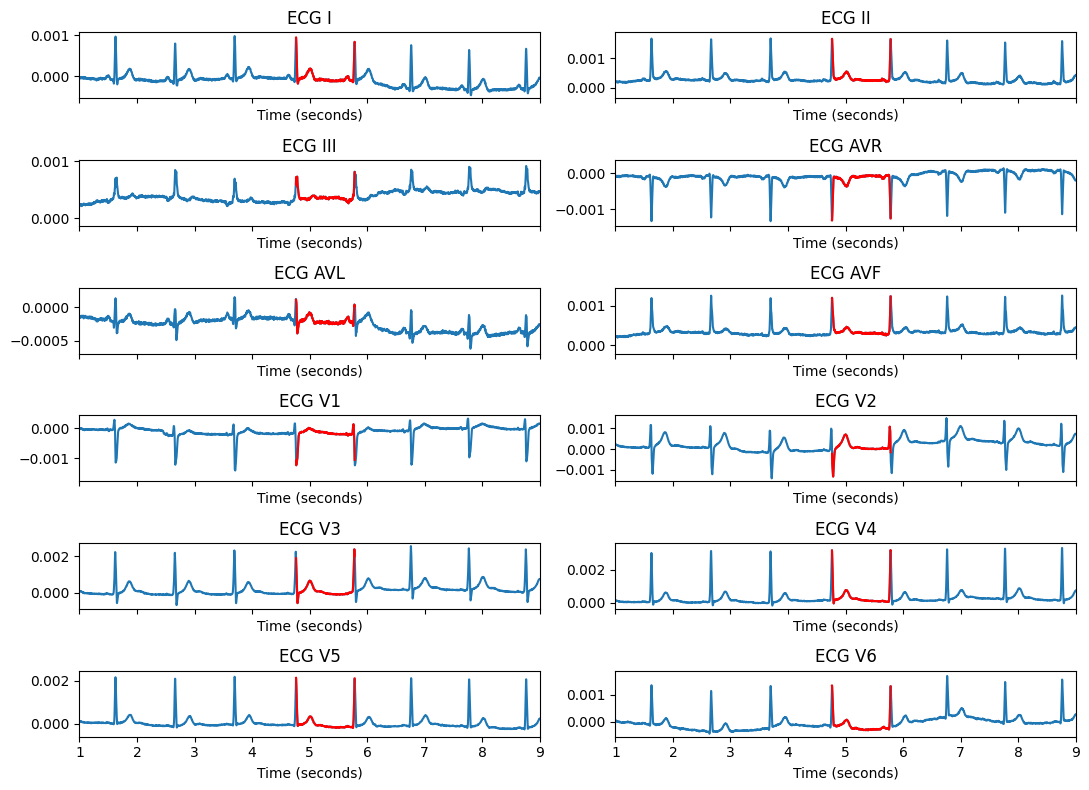

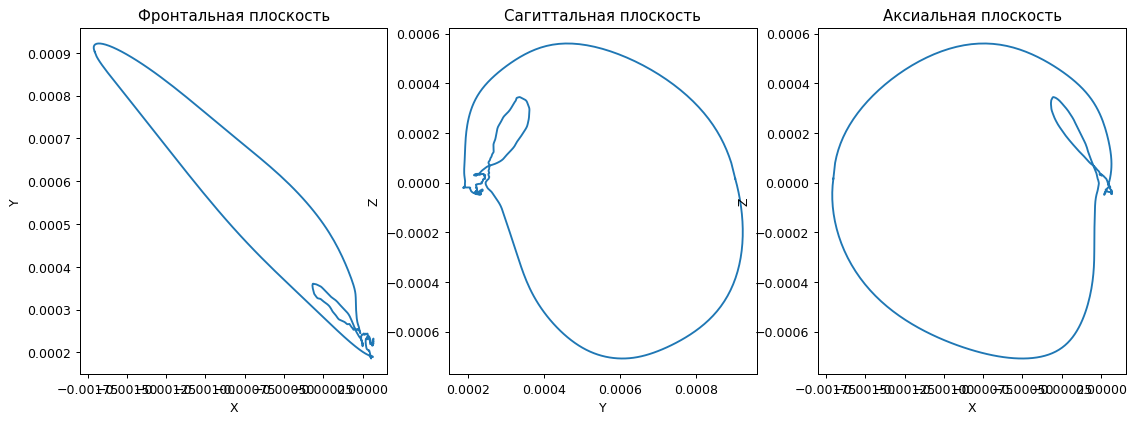

In [5]:
input_data = {}
input_data["data_edf"] = 'Data_VECG/ECG_1.edf'
input_data["n_term_start"] = 5
input_data["n_term_finish"] = None
input_data["filt"] = False
input_data["f_sreza"] = 0.7
input_data["f_sampling"] = 2000
input_data["show_ecg"] = True
input_data["plot_3d"] = True
input_data["qrs_loop_area"] = True
input_data["t_loop_area"] = True
input_data["count_qrst_angle"] = True
input_data["mean_filter"] = True
input_data["predict"] = True
input_data["plot_projections"] = True
res = get_VECG(input_data)

In [8]:
message = []
if res == 'no_this_period':
    print('WARNING')
if res == 'too_noisy':
    print('WARNING')

if len(res) == 4:
    area_projections, angle_qrst, angle_qrst_front, message_predict = res
    if input_data["predict"]:
        message.append('СППР: ' + message_predict)
    if input_data["qrs_loop_area"]:
        message.append(f'Площадь петли QRS во фронтальной плоскости: {"{:.3e}".format(area_projections[0])}')
        message.append(f'Площадь петли QRS во сагиттальной плоскости: {"{:.3e}".format(area_projections[1])}')
        message.append(f'Площадь петли QRS во аксиальной плоскости: {"{:.3e}".format(area_projections[2])}')
    if len(area_projections) == 6:
        message.append(f'Площадь петли ST-T во фронтальной плоскости: {"{:.3e}".format(area_projections[3])}')
        message.append(f'Площадь петли ST-T во сагиттальной плоскости: {"{:.3e}".format(area_projections[4])}')
        message.append(f'Площадь петли ST-T во аксиальной плоскости: {"{:.3e}".format(area_projections[5])}')
    elif input_data["t_loop_area"]:
        message.append(f'Площадь петли ST-T во фронтальной плоскости: {"{:.3e}".format(area_projections[0])}')
        message.append(f'Площадь петли ST-T во сагиттальной плоскости: {"{:.3e}".format(area_projections[1])}')
        message.append(f'Площадь петли ST-T во аксиальной плоскости: {"{:.3e}".format(area_projections[2])}')
    if input_data["count_qrst_angle"]:
        message.append(f'Пространственный угол QRST равен {round(angle_qrst, 2)} градусов')
        message.append(f'Проекция угла QRST на фронтальную плоскость равна {round(angle_qrst_front, 2)} градусов')
        

In [9]:
message

['СППР: Здоров с вероятностью 99.85%',
 'Площадь петли QRS во фронтальной плоскости: 2.795e-07',
 'Площадь петли QRS во сагиттальной плоскости: 6.375e-07',
 'Площадь петли QRS во аксиальной плоскости: 1.637e-06',
 'Площадь петли ST-T во фронтальной плоскости: 7.587e-09',
 'Площадь петли ST-T во сагиттальной плоскости: 1.548e-08',
 'Площадь петли ST-T во аксиальной плоскости: 2.342e-08',
 'Пространственный угол QRST равен 41.57 градусов',
 'Проекция угла QRST на фронтальную плоскость равна 25.86 градусов']